**Problem 1:Hand gesture recognition using Convolutional Neural Network
(CNN)**

In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
# Loading dataset
train_data_path = '/content/sign_mnist_train.csv'

#The column 'label' contains the class (sign language letter).
#The rest are pixel intensities ranging from 0 to 255.

#train_labels: Contains the target classes (sign language letters).
#train_images: Contains the pixel values of images.

train_data = pd.read_csv(train_data_path)
train_labels = train_data['label']
train_images = train_data.drop('label', axis=1).values

# Reshape and normalize the data
#The raw data is reshaped from a flat array (1D, length 784)
#to a 28x28x1 array, matching the expected input for Convolutional Neural Networks (CNNs).

train_images = train_images.reshape(-1, 28, 28, 1) / 255.0  # Normalize to [0, 1]
#Pixel intensities are scaled to a range of [0, 1]
#improving model performance and stability during training.
train_labels = to_categorical(train_labels, num_classes=26)  # One-hot encoding

# Splitting into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Defining the CNN model
model = Sequential([
    #1st CONVO LAYER: Adds 32 filters of size 3x3.
    #ReLU activation introduces non-linearity, allowing the network to learn complex patterns.
    #Input shape: (28, 28, 1), where 1 denotes grayscale.
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),

  #Reduces spatial dimensions (height, width) by selecting the max value in a 2x2 region.
  #Helps reduce computation and overfitting.
    MaxPooling2D(pool_size=(2, 2)),

    #2ND LAYER: Similar to the first but with 64 filters, allowing it to capture higher-level features.
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(), #Converts the 2D feature maps into a 1D vector
    Dense(128, activation='relu'), #Fully connected layer with 128 neurons. Captures complex relationships between extracted features.
    Dropout(0.28), #Randomly drops 28% of neurons during training to reduce overfitting.
    Dense(26, activation='softmax') #Softmax outputs probabilities for each class;26 neurons, one for each class.
])

# Compiling the model
model.compile(optimizer='adam',
              #The optimizer is used to minimize the loss function during training by adjusting the model's weights.
              loss='categorical_crossentropy', #Measures the difference between predicted probabilities and true one-hot encoded labels, -sigma(Yi*log(pi))
              metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=20,
                    batch_size=64)

# Evaluating the model

val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.2503 - loss: 2.5019 - val_accuracy: 0.8563 - val_loss: 0.5339
Epoch 2/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.7988 - loss: 0.6172 - val_accuracy: 0.9625 - val_loss: 0.1738
Epoch 3/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.9039 - loss: 0.2944 - val_accuracy: 0.9894 - val_loss: 0.0664
Epoch 4/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.9492 - loss: 0.1606 - val_accuracy: 0.9980 - val_loss: 0.0246
Epoch 5/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.9686 - loss: 0.1033 - val_accuracy: 0.9995 - val_loss: 0.0128
Epoch 6/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.9744 - loss: 0.0819 - val_accuracy: 0.9996 - val_loss: 0.0107
Epoch 7/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.9813 - loss: 0.0625 - val_accuracy: 0.9993 - val_loss: 0.0055
Epoch 8/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.9826 - loss: 0.0521 - 

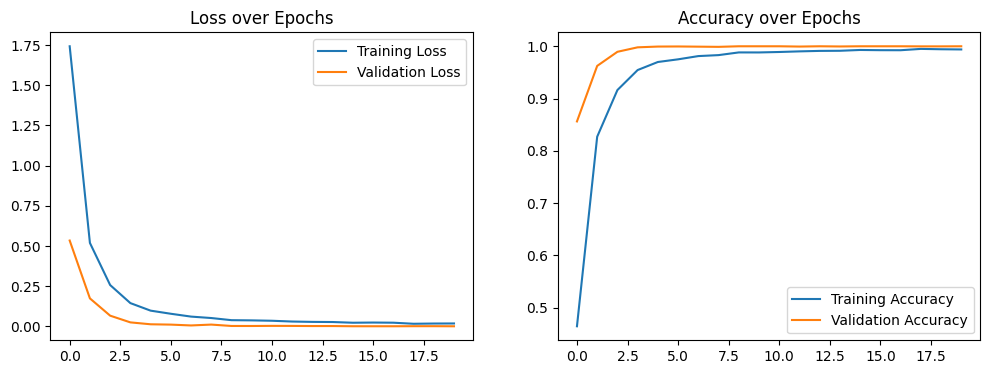

In [ ]:
# Plotting training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

In [ ]:
# Saving observations to a text file
observations = f"""
Validation Accuracy: {val_accuracy}
Validation Loss: {val_loss}

Observations:
1. The model learns hierarchical representations of input features, capturing patterns from basic edges to complex textures.
2. Dropout regularizes the model and mitigates overfitting.
3. Adding another dropout layer with rate 0.4 after convolution layers might further reduce overfitting.
4. The CNN architecture adheres to shared structure and invariance properties for handling image classification tasks.

"""

with open("model_observations.txt", "w") as f:
    f.write(observations)

print("Model observations saved to model_observations.txt.")

Model observations saved to model_observations.txt.


**Problem 2: Time Series Forecasting (Energy Consumption Forecasting) using LSTMs.**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
# Loading the Dataset
file_path = "/content/household_power_consumption.txt"
data = pd.read_csv(file_path, sep=';', parse_dates=[[0, 1]], na_values=['?'],
                   infer_datetime_format=True, low_memory=False)
#Combines the first two columns (Date and Time) into a single column called Date_Time, interpreted as a datetime object.
#Treats ? as missing values (NaN).
#Automatically infers the format of the date-time strings for faster parsing.
data.rename(columns={'Date_Time': 'Datetime'}, inplace=True)

<ipython-input-7-871aec54b5cb>:3: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv(file_path, sep=';', parse_dates=[[0, 1]], na_values=['?'],
<ipython-input-7-871aec54b5cb>:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv(file_path, sep=';', parse_dates=[[0, 1]], na_values=['?'],
<ipython-input-7-871aec54b5cb>:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv(file_path, sep=';', parse_dates=[[0, 1]], na_values=['?'],


In [8]:
# Convert to datetime and drop NA values
 #converts from string to datetime object since we need to add datetime later we cannot leave it in string format
data['Datetime'] = pd.to_datetime(data['Datetime'])

#The Datetime column represents time-based data
# and setting it as the index makes it easier to perform time series operations, such as resampling or time-based filtering.
data.set_index('Datetime', inplace=True)
# Modifies the data DataFrame directly without the need to create a new one.
data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
 # This line converts the Global_active_power column to numeric values.
 #By using errors='coerce', you can handle these invalid values by replacing them with NaN

In [9]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [10]:
# Check for null values in the entire dataset
print(data.isnull().sum())
if data.isnull().values.any(): #Flattens the DataFrame of boolean True/False values into a 1D array.
#Checks if any element in the array is True, indicating the presence of at least one missing value.
    print("There are null values in the dataset.")
else:
    print("No null values found.")

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64
There are null values in the dataset.


In [11]:
data.dropna(inplace=True) #This function is used to remove rows or columns with missing values.
if data.isnull().values.any():
    print("There are null values in the dataset.")
else:
    print("No null values found.")


No null values found.


In [12]:
# Resample to daily energy consumption
#The original dataset is recorded at a minute-level granularity. To forecast daily energy consumption, we must aggregate the data by day.

 #This gives the total power consumption per day, aggregating the minute-level data
 # D stands for day, taken from datetime format
daily_data = data['Global_active_power'].resample('D').sum().to_frame() #Resamples minute-level data into daily totals using .resample('D').sum(). (IMPORTANT STUFF)
daily_data.rename(columns={'Global_active_power': 'Daily_power_consumption'}, inplace=True) #Converts the aggregated values into a column named 'Daily_power_consumption'.

# Feature Scaling
#Scales the data to have zero mean and unit variance using standardization
#This is critical for LSTMs to avoid large values dominating the learning process.

scaler = StandardScaler()
scaled_data = scaler.fit_transform(daily_data)

# Create Time Series Input for LSTM
#Converts the time series into sequences
#X: Inputs, e.g., the past lookback days of power consumption.
#y: Outputs, e.g., the next day's power consumption.
def create_sequences(data, lookback): # convert a time series dataset into input-output pairs
#lookback= This defines the sequence length.
    X, y = [], []
    #X: This list will store the input sequences (subarrays of data).
    #y: This list will store the corresponding output values (the value we are trying to predict).
    for i in range(len(data) - lookback):
        X.append(data[i:i + lookback, 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

lookback = 30  # Use the last 30 days to predict the next day
X, y = create_sequences(scaled_data, lookback)

# Reshape for LSTM input
X = X.reshape((X.shape[0], X.shape[1], 1)) #(samples, time_steps, features)

# Train-Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM Model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(lookback, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])
#LSTM Layer: 50 memory units (neurons).
#DENSE: A single neuron predicts the next day's energy consumption.

model.compile(optimizer='adam', loss='mse') #The optimizer is used to minimize the loss function during training by adjusting the model's weights.
#Adaptive Moment Estimation


# Train the Model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#Stops training if the validation loss doesn't improve for 10 consecutive epochs to prevent overfitting.

history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, callbacks=[early_stopping]) #Stores details of training process
#Validation Split: 20% of the training data is used for validation.
#Epochs: Maximum of 20 iterations over the entire training data.
#Batch Size: Processes 32 sequences at a time.


# Evaluate the Model
#Generates predictions for the test set (X_test) using the trained LSTM model.
y_pred = model.predict(X_test)

#Reverts the scaled values back to their original scale (e.g., kilowatts) after scaling
#Scaling was applied earlier to normalize the data for better model performance.
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.9247 - val_loss: 0.5171
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.7091 - val_loss: 0.4659
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.6926 - val_loss: 0.4140
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.6621 - val_loss: 0.4340
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.6029 - val_loss: 0.4090
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.6348 - val_loss: 0.4015
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.6351 - val_loss: 0.3986
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.6698 - val_loss: 0.4039
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.6390 - val_loss: 0.4171
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.5724 - val_loss: 0.3973
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.6593 - val_loss: 0.4097
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.5719 - val_l

In [13]:

mae = mean_absolute_error(y_test_inv, y_pred_inv) #Average of the absolute errors between actual and predicted values.
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv)) #Penalizes larger errors more heavily, making it sensitive to outliers.
print(f"MAE: {mae}, RMSE: {rmse}")


MAE: 263.1661792578815, RMSE: 373.37230655330643


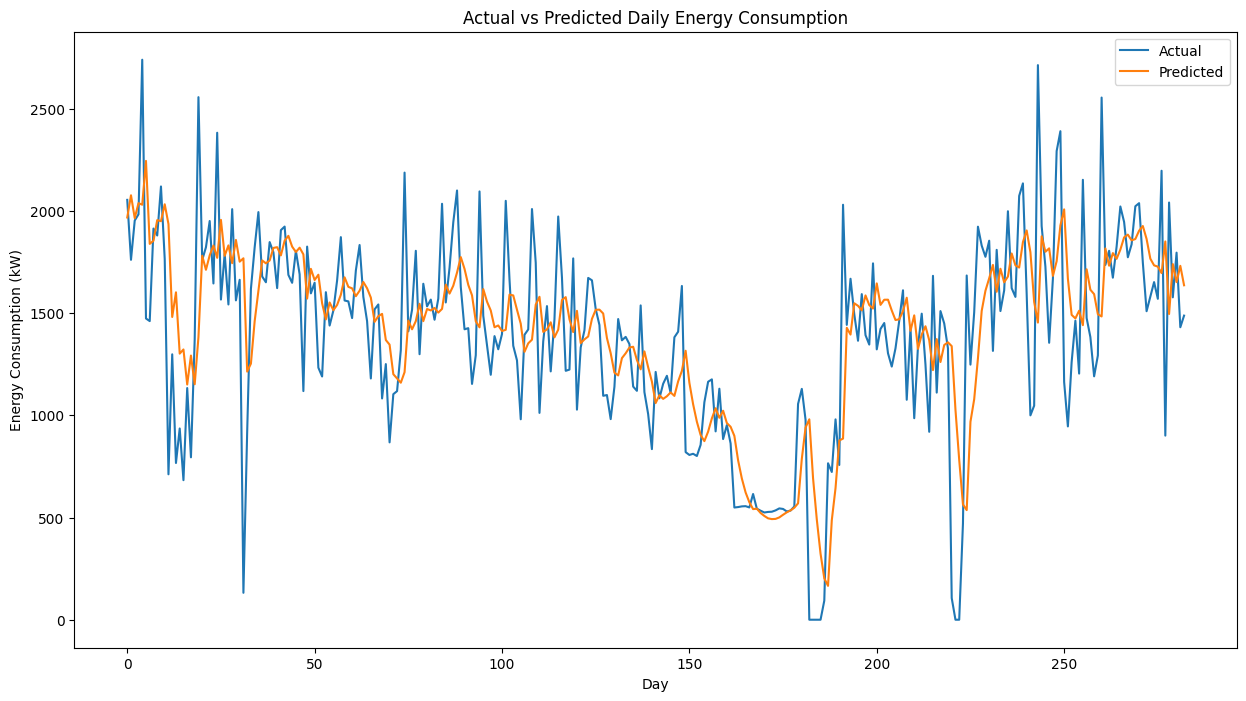

In [ ]:
# Visualization
plt.figure(figsize=(15, 8))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.xlabel('Day')
plt.ylabel('Energy Consumption (kW)')
plt.title('Actual vs Predicted Daily Energy Consumption')
plt.legend()
plt.show()
